In [1]:
import os, sys
# sys.path.insert(1, '/Users/arcticfox/Documents/GitHub/stella/')
import stella
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.size'] = 20

2024-08-06 15:03:37.827605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# download = stella.DownloadSets(fn_dir='lc')
# download.download_catalog()

In [3]:
# download.flare_table

In [4]:
# download.flare_table = download.flare_table
# download.download_lightcurves()

In [5]:
ds = stella.FlareDataSet(fn_dir='lc',
                         catalog='lc/Guenther_2020_flare_catalog.txt')

Reading in training set files.


100%|██████████| 1613/1613 [00:02<00:00, 801.86it/s]


8638 positive classes (flare)
35457 negative classes (no flare)
24.0% class imbalance


Text(0.5, 0, 'Cadences')

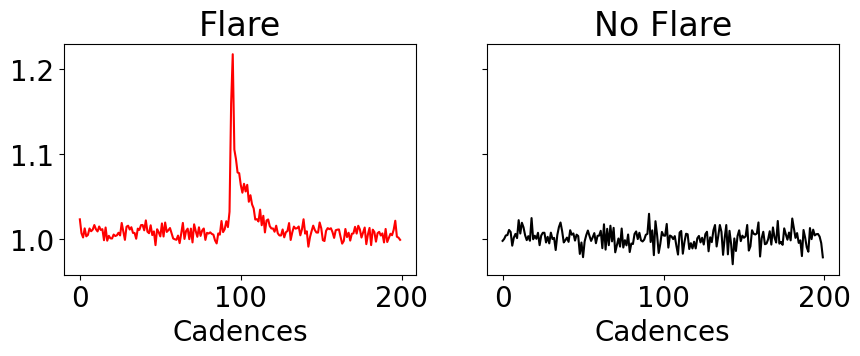

In [6]:
n = 12
ind_pc = np.where(ds.train_labels==1)[0] # Flares
ind_nc = np.where(ds.train_labels==0)[0] # No flares

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3),
                               sharex=True, sharey=True)
ax1.plot(ds.train_data[ind_pc[n]], 'r')
ax1.set_title('Flare')
ax1.set_xlabel('Cadences')
ax2.plot(ds.train_data[ind_nc[n]], 'k')
ax2.set_title('No Flare')
ax2.set_xlabel('Cadences')

In [7]:
OUT_DIR = './models'

In [8]:
cnn = stella.ConvNN(output_dir=OUT_DIR,
                    ds=ds)

In [9]:
cnn.train_models(seeds=2, epochs=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 200, 16)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 16)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           3136      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 50, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 64)            0

2024-08-06 15:03:48.089925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
552/552 [==============================] - 3s 5ms/step - loss: 0.4888 - accuracy: 0.8052 - precision: 0.7353 - recall: 0.0072 - val_loss: 0.4483 - val_accuracy: 0.8172 - val_precision: 1.0000 - val_recall: 0.0799
Epoch 2/50
552/552 [==============================] - 3s 5ms/step - loss: 0.3521 - accuracy: 0.8661 - precision: 0.9747 - recall: 0.3239 - val_loss: 0.2354 - val_accuracy: 0.9131 - val_precision: 0.9590 - val_recall: 0.5879
Epoch 3/50
552/552 [==============================] - 3s 5ms/step - loss: 0.2319 - accuracy: 0.9208 - precision: 0.9352 - recall: 0.6394 - val_loss: 0.1746 - val_accuracy: 0.9347 - val_precision: 0.9579 - val_recall: 0.7021
Epoch 4/50
552/552 [==============================] - 3s 5ms/step - loss: 0.2106 - accuracy: 0.9287 - precision: 0.9339 - recall: 0.6839 - val_loss: 0.1782 - val_accuracy: 0.9326 - val_precision: 0.9692 - val_recall: 0.6826
Epoch 5/50
552/552 [==============================] - 3s 5ms/step - loss: 0.1941 - accuracy: 0.9352 - pr

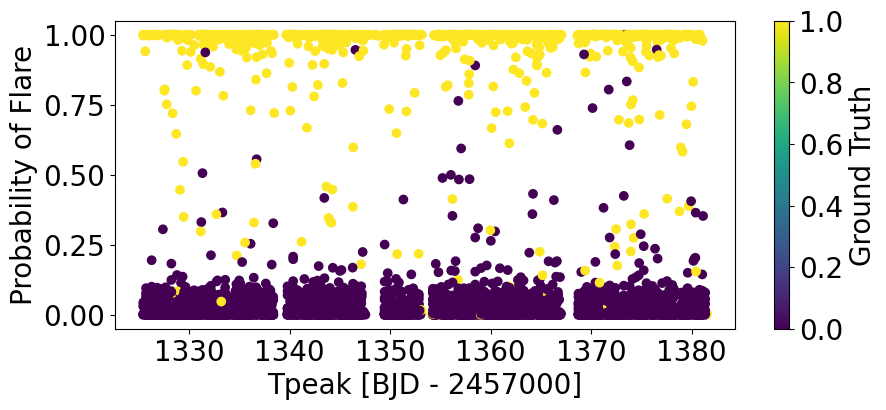

In [10]:
plt.figure(figsize=(10,4))
plt.scatter(cnn.val_pred_table['tpeak'], cnn.val_pred_table['pred_s0002'],
            c=cnn.val_pred_table['gt'], vmin=0, vmax=1)
plt.xlabel('Tpeak [BJD - 2457000]')
plt.ylabel('Probability of Flare')
plt.colorbar(label='Ground Truth')

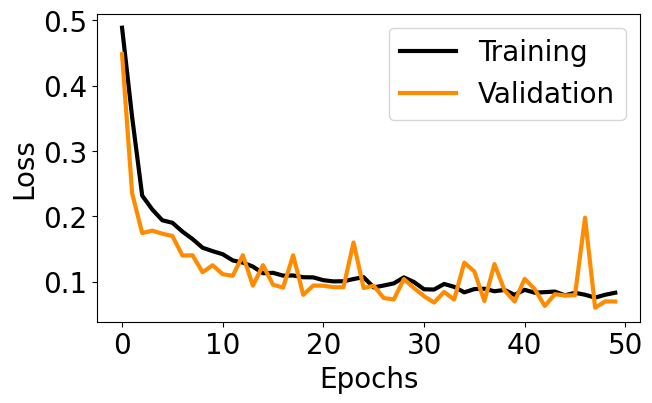

In [11]:
plt.figure(figsize=(7,4))
plt.plot(cnn.history_table['loss_s0002'], 'k', label='Training', lw=3)
plt.plot(cnn.history_table['val_loss_s0002'], 'darkorange', label='Validation', lw=3)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

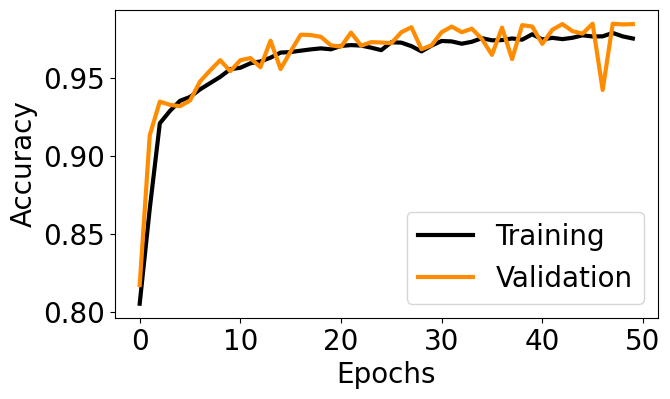

In [12]:
plt.figure(figsize=(7,4))
plt.plot(cnn.history_table['accuracy_s0002'], 'k', label='Training', lw=3)
plt.plot(cnn.history_table['val_accuracy_s0002'], 'darkorange', label='Validation', lw=3)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

/var/folders/xz/wtc1z8951gz41xypk5k5jbjw0000gn/T/ipykernel_56300/2663639505.py:2: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lc = search_lightcurvefile(target='tic62124646', mission='TESS')
/Users/grant/opt/anaconda3/envs/stella/lib/python3.8/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 11 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/var/folders/xz/wtc1z8951gz41xypk5k5jbjw0000gn/T/ipykernel_56300/2663639505.py:3: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc.download().PDCSAP_FLUX


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

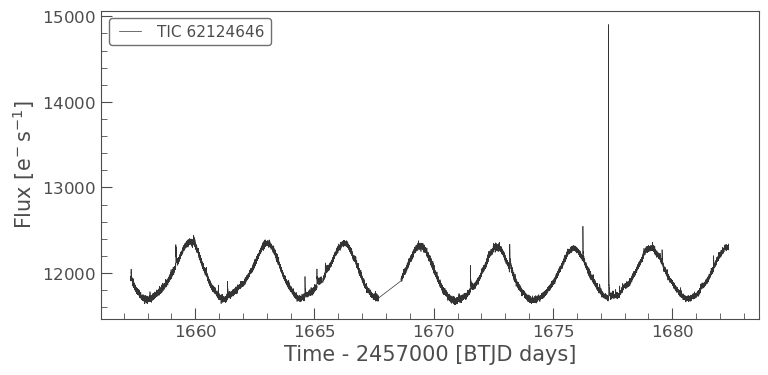

In [13]:
from lightkurve.search import search_lightcurvefile
lc = search_lightcurvefile(target='tic62124646', mission='TESS')
lc = lc.download().PDCSAP_FLUX
lc.plot()

In [14]:
cnn.predict(modelname='models/ensemble_s0002_i0050_b0.73.h5',
            times=lc.time.to_value(format='mjd'),
            fluxes=lc.flux,
            errs=lc.flux_err)

  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


Text(0.5, 1.0, 'TIC 62124646')

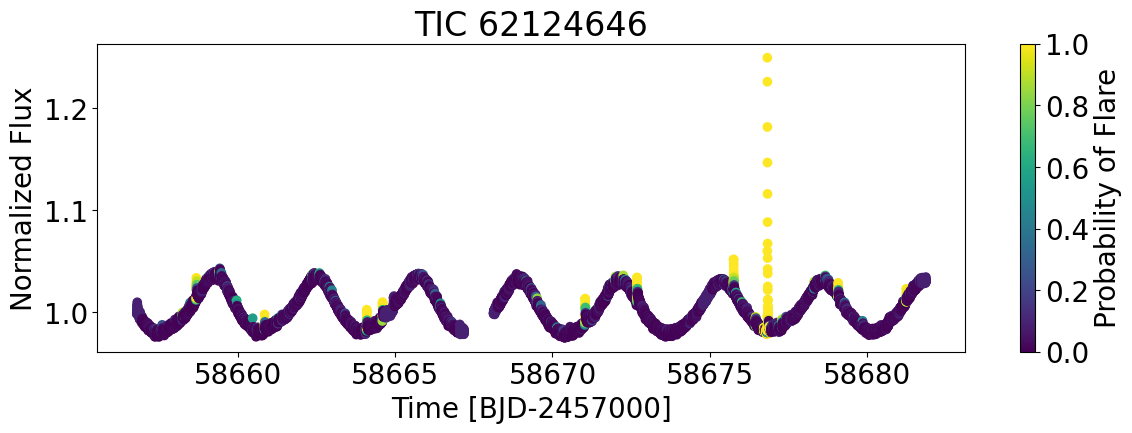

In [16]:
plt.figure(figsize=(14,4))
plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=cnn.predictions[0], vmin=0, vmax=1)
# plt.plot(cnn.predict_time[0], cnn.predictions[0], '.')
plt.colorbar(label='Probability of Flare')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Normalized Flux')
plt.title('TIC {}'.format(lc.targetid))
# plt.xlim(58656.7, 58658)